In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
import json

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

params = json.loads(open('../params.json', 'r').read())

# Date range
start = "2023-01-01"
end = "2023-07-01"

# Tickers of assets
industry_asset = json.loads(open('../stocks.json', 'r').read())
assets = []
for key, values in industry_asset.items():
    for value in values:
        assets.append(value)

# Downloading data
data = yf.download(assets, start = start, end = end)

data = data.loc[:,('Adj Close', slice(None))]

data.columns = assets


[*********************100%%**********************]  23 of 23 completed


In [2]:
# Calculating returns
Y = data[assets].pct_change().dropna()

display(Y.head())

,TIMS3.SA,VIVT3.SA,SUZB3.SA,KLBN11.SA,CSAN3.SA,VBBR3.SA,PRIO3.SA,UGPA3.SA,ENAT3.SA,PETR3.SA,...,ALUP11.SA,CPFE3.SA,CMIG3.SA,ELET3.SA,EQTL3.SA,EGIE3.SA,VALE3.SA,GGBR3.SA,CSNA3.SA,FESA4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,-1.2608%,0.2556%,-1.2426%,-4.1205%,-1.1549%,-0.9110%,-1.8724%,-5.8955%,-1.4289%,-2.4437%,...,0.9476%,-1.4138%,-6.6921%,1.7762%,-1.0489%,-2.4207%,-1.5899%,-0.1790%,-2.9932%,-2.0060%
2023-01-04,-2.0066%,1.7209%,1.1639%,0.7056%,0.7560%,0.0541%,2.6864%,1.5067%,-1.2833%,0.1957%,...,0.3952%,1.6667%,-0.6122%,0.2006%,-0.1178%,1.7964%,2.3809%,0.1793%,2.9453%,2.1873%
2023-01-05,1.7126%,0.6892%,0.1244%,2.0382%,6.6166%,-0.6487%,0.1956%,4.2969%,-0.0963%,0.3125%,...,0.7382%,3.2406%,2.5814%,0.6206%,0.4127%,-0.9244%,1.3289%,1.6778%,0.4768%,2.6894%
2023-01-06,-1.1713%,-1.4935%,-1.0559%,3.4956%,4.0947%,0.2992%,0.0488%,-0.2996%,-0.5060%,-0.3115%,...,-0.7328%,-0.6278%,0.6005%,-0.6367%,3.8461%,1.2723%,1.1475%,1.5842%,0.6780%,2.1379%
2023-01-09,1.9630%,2.0215%,0.9102%,-0.4825%,0.4302%,2.4681%,0.7317%,5.7851%,0.0727%,1.3672%,...,0.4429%,0.6689%,2.3593%,1.3416%,1.0744%,0.0838%,-0.3242%,0.1083%,-0.8754%,-0.3140%


In [3]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,TIMS3.SA,VIVT3.SA,SUZB3.SA,KLBN11.SA,CSAN3.SA,VBBR3.SA,PRIO3.SA,UGPA3.SA,ENAT3.SA,PETR3.SA,...,ALUP11.SA,CPFE3.SA,CMIG3.SA,ELET3.SA,EQTL3.SA,EGIE3.SA,VALE3.SA,GGBR3.SA,CSNA3.SA,FESA4.SA
weights,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,34.0421%,0.0000%,0.0000%,0.0000%,0.0000%,...,13.2552%,16.0948%,0.0000%,0.0000%,0.0000%,18.5430%,18.0648%,0.0000%,0.0000%,0.0000%


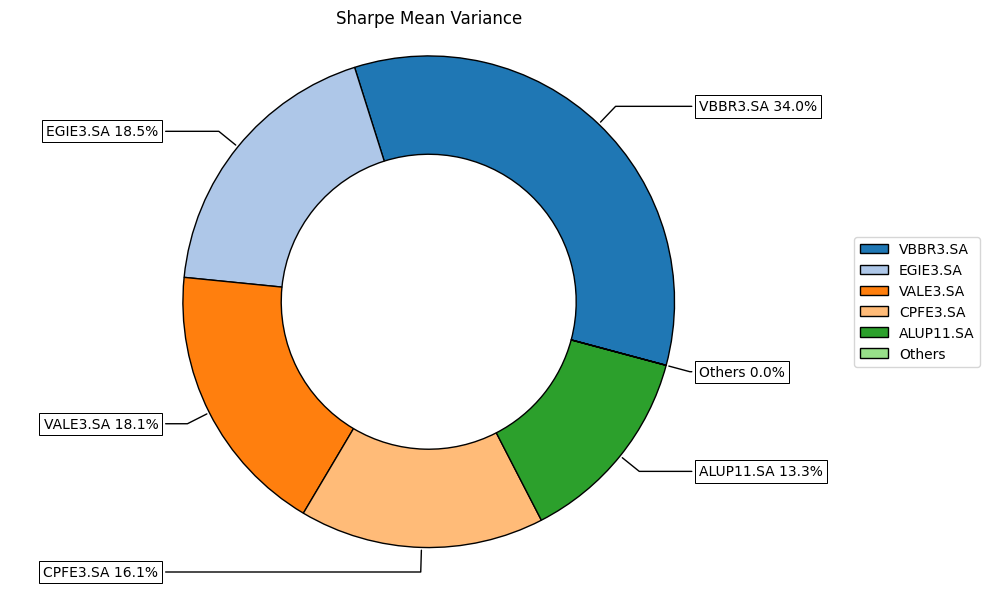

In [4]:
# Plotting the composition of the portfolio

title = 'Sharpe Mean Variance'

ax = rp.plot_pie(w=w, title=title, others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

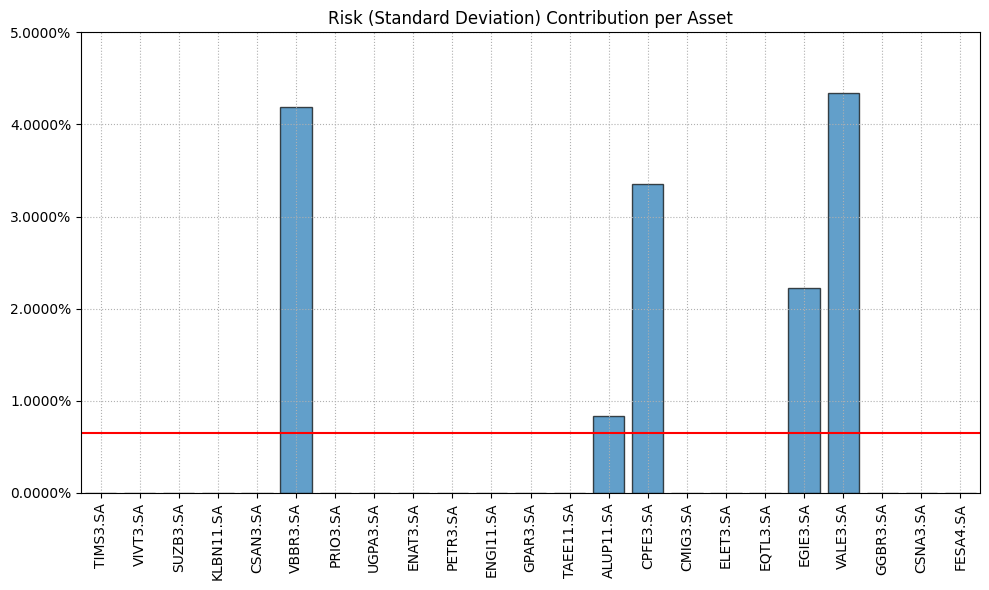

In [5]:
# Plotting the risk composition of the portfolio

ax = rp.plot_risk_con(w, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)

In [6]:
"""
self.cov_l = cov_l
self.cov_u = cov_u
self.cov_mu = cov_mu
self.cov_sigma = cov_sigma
self.d_mu = d_mu
self.k_mu = k_mu
self.k_sigma = k_sigma
"""

print(port.cov_l)

None


In [7]:
# Select method and estimate worst case input parameters:

box = 's' # Method to estimate box uncertainty sets parameters
ellip = 's' # Method to estimate elliptical uncertainty sets parameters
q = 0.05 # Confidence level for bootstrapping and k ellipsoidal uncertainty sets constraints
n_sim = 3000 # Number of scenarios for bootstrapping
window = 3 # Size of each block for block bootstrapping
dmu = 0.1 # delta to increase or decrease the mean vector
dcov = 0.1 # delta to increase or decrease the covariance matrix
seed = 0 

port.wc_stats(box=box, ellip=ellip, q=q, n_sim=n_sim, window=window, dmu=dmu, dcov=dcov, seed=seed)

# Estimate worst case optimal portfolio using selected uncertainty sets:
# port.solvers = ['CLARABEL']

Umu = 'box' # Type of uncertainty set for mean vector
Ucov = 'box' # Type of uncertaity set for covariance matrix

w_wc_1 = port.wc_optimization(obj=obj, rf=rf, l=l, Umu=Umu, Ucov=Ucov)

display(w_wc_1.T)

,TIMS3.SA,VIVT3.SA,SUZB3.SA,KLBN11.SA,CSAN3.SA,VBBR3.SA,PRIO3.SA,UGPA3.SA,ENAT3.SA,PETR3.SA,...,ALUP11.SA,CPFE3.SA,CMIG3.SA,ELET3.SA,EQTL3.SA,EGIE3.SA,VALE3.SA,GGBR3.SA,CSNA3.SA,FESA4.SA
weights,1.6552%,0.0001%,0.0001%,0.0000%,0.0000%,80.9966%,0.0000%,0.0000%,0.0000%,0.0001%,...,1.4477%,6.9410%,0.0000%,0.0433%,5.8388%,0.1047%,2.7229%,0.0021%,0.0001%,0.0001%


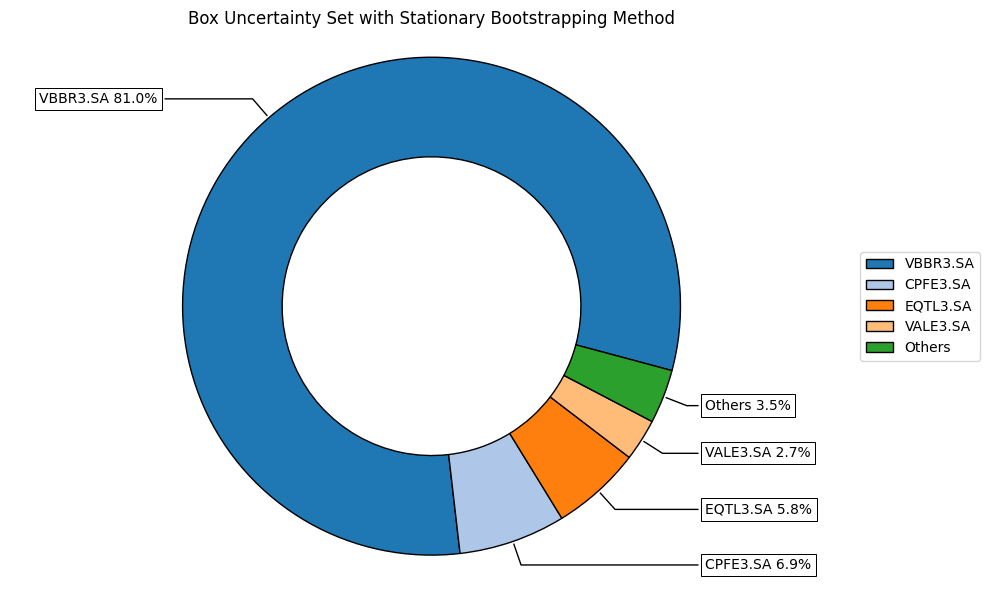

In [8]:
# Plotting the composition of the portfolio

title = 'Box Uncertainty Set with Stationary Bootstrapping Method'

ax = rp.plot_pie(w=w_wc_1, title=title, others=0.05, nrow=25,
                 cmap = "tab20", height=6, width=10, ax=None)

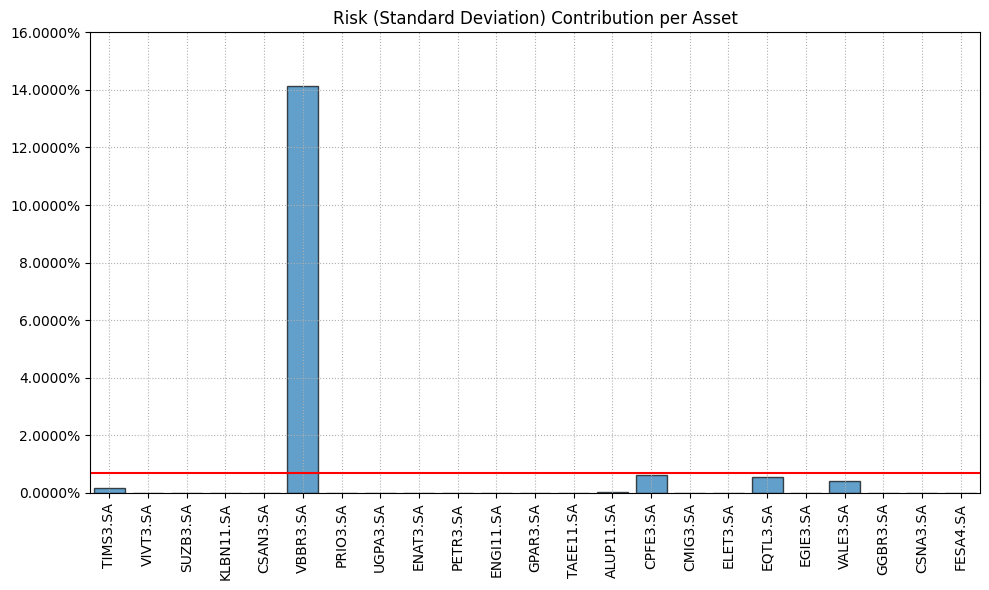

In [9]:
# Plotting the risk composition of the portfolio

ax = rp.plot_risk_con(w_wc_1, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)

In [10]:
# Select method and estimate worst case input parameters:

box = 'd' # Method to estimate box uncertainty sets parameters
ellip = 's' # Method to estimate elliptical uncertainty sets parameters
q = 0.05 # Confidence level for bootstrapping and k ellipsoidal uncertainty sets constraints
n_sim = 3000 # Number of scenarios for bootstrapping
window = 3 # Size of each block for block bootstrapping
dmu = 0.1 # delta to increase or decrease the mean vector
dcov = 0.1 # delta to increase or decrease the covariance matrix
seed = 0

port.wc_stats(box=box, ellip=ellip, q=q, n_sim=n_sim, window=window, dmu=dmu, dcov=dcov, seed=seed)

# Estimate worst case optimal portfolio using selected uncertainty sets:

Umu = 'box' # Type of uncertainty set for mean vector
Ucov = 'box' # Type of uncertainty set for covariance matrix

w_wc_2 = port.wc_optimization(obj=obj, rf=rf, l=l, Umu=Umu, Ucov=Ucov)

display(w_wc_2.T)

,TIMS3.SA,VIVT3.SA,SUZB3.SA,KLBN11.SA,CSAN3.SA,VBBR3.SA,PRIO3.SA,UGPA3.SA,ENAT3.SA,PETR3.SA,...,ALUP11.SA,CPFE3.SA,CMIG3.SA,ELET3.SA,EQTL3.SA,EGIE3.SA,VALE3.SA,GGBR3.SA,CSNA3.SA,FESA4.SA
weights,3.3824%,0.2424%,0.0000%,0.0000%,0.0000%,27.9382%,0.0000%,0.0000%,0.0000%,0.0000%,...,17.1296%,10.6952%,0.0000%,0.0000%,8.7349%,15.2445%,10.0946%,0.0000%,0.0000%,0.0000%


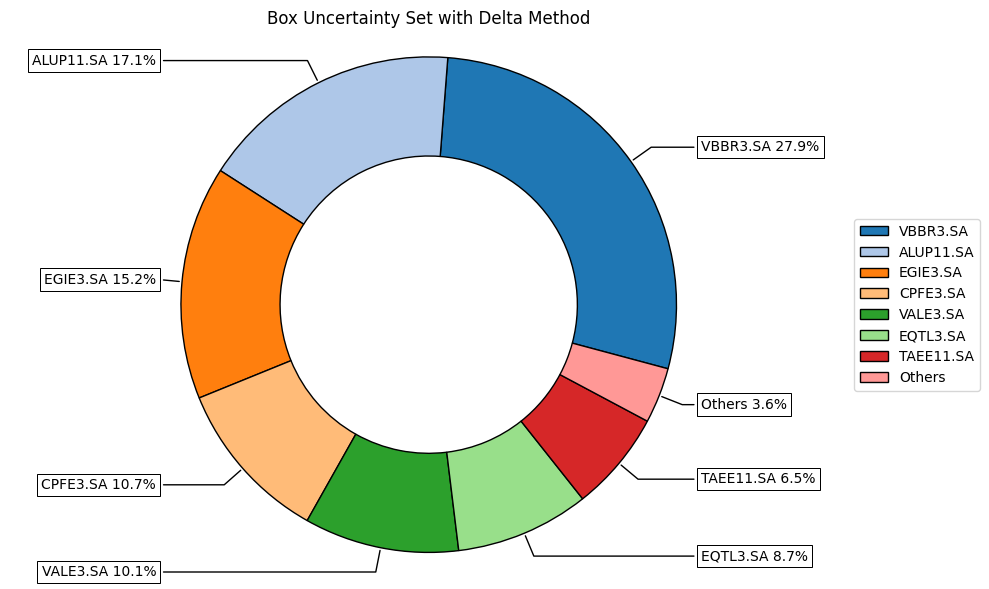

In [11]:
# Plotting the composition of the portfolio

title = 'Box Uncertainty Set with Delta Method'

ax = rp.plot_pie(w=w_wc_2, title=title, others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

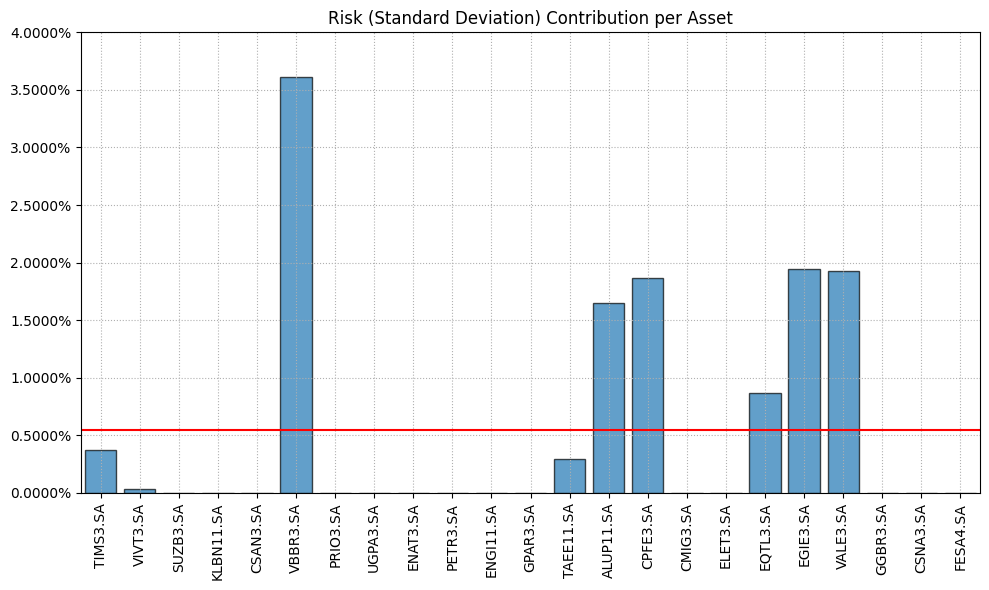

In [12]:
# Plotting the risk composition of the portfolio

ax = rp.plot_risk_con(w_wc_2, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)